# Image Classification German Traffic Signals

## Load all libraries

In [1]:
## Libraries 
import numpy as np 
import pandas as pd 
import ma## Load all librariestplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
import visualkeras

## Extract images from the zipfile

In [62]:
# Extract images from the zipfile# import zipfile
zip_ref = zipfile.ZipFile('archive.zip', 'r')
zip_ref.extractall('../Project/archive_new')
zip_ref.close()

## Read in the training dataset images and convert them to 60\*60 resolution

In [2]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 60
width = 60
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    path = "../Project/archive_new/Train/{0}/".format(i)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [3]:
len(Cells)

39209

## Splitting images into training and validation set

In [4]:
## Splitting images into training and validation set#Splitting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

## Read in the test dataset images and convert them to 60\*60 resolution

In [5]:
#Predicting with the test data
y_test=pd.read_csv("../Project/archive_new/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../Project/archive_new/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 

In [6]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape, X_test.shape,y_test.shape

((31368, 60, 60, 3),
 (31368, 43),
 (7841, 60, 60, 3),
 (7841, 43),
 (12630, 60, 60, 3),
 (12630,))

## Dictionary of 43 class labels

In [7]:
## Dictionary of 43 class labelsclass_desc = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Define a function to fit the training set to the model

In [8]:
## Define a function to fit the training set to the modeldef model_fitting(model, X_train, y_train, X_val, y_val):
    # Using ten epochs for the training and saving the accuracy for each epoch
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
    validation_data=(X_val, y_val))
    
    return history

## Function to display training and validation accuracy versus epochs

In [9]:
## Function to display training and validation accuracy versus epochs#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    return

def plot_validation(history):    
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    return

## Function to predict the image class label 

In [10]:
## Function to predict the image class label def predict_class(model, X_test):
    pred_x = model.predict(X_test)
    classes_x=np.argmax(pred_x,axis=1)
    
    return classes_x

## Function to return accuracy score of the model

In [11]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score

def accuracy(y_test, classes_x):
    return accuracy_score(y_test, classes_x)

## Function to plot the confusion matrix

In [12]:
from sklearn import metrics

def confusion_matrix_plot(y_test, classes_x):
    cnf_matrix_test = metrics.confusion_matrix(y_test, classes_x)

    ticks = [str(i) for i in range(classes)]

    plt.figure(figsize=(20,20))
    plt.imshow(cnf_matrix_test, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix - Test Set', size = 15)
    tick_marks = np.arange(43)
    plt.xticks(tick_marks, ticks, rotation=45, size = 10)
    plt.yticks(tick_marks, ticks, size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cnf_matrix_test.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cnf_matrix_test[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')
    
    return cnf_matrix_test

## Function to display common patterns in image misclassification

In [13]:
def misclassified_img(cnf_matrix_test, X_test, y_test):

    cnf_matrix_new = cnf_matrix_test
    np.fill_diagonal(cnf_matrix_new, 0)
    cnf_matrix_new = pd.DataFrame(cnf_matrix_new)

    index = []
    cols = []
    val = []

    for i in range(classes):
        lst = cnf_matrix_new.index[cnf_matrix_new[i]>10].to_list()
        if len(lst)>0:
            index.append(lst)
            cols.append([i]*len(lst))
            
    t = []
    [t.extend(x) for x in index]
    index = t
    
    t = []
    [t.extend(x) for x in cols]
    cols = t

    return index,cols

def plot_misclassified_img(index, cols, X_test, y_test, grid_x, grid_y):
    i = 0
    fig, ax = plt.subplots(grid_x, grid_y, sharex= True, sharey=False)
    fig.set_size_inches(30, 15,  forward=True)

    for idx, ax_i in enumerate(ax.flatten()):
        actual_class = index[idx]
        predicted_class = cols[idx]
        mask_actual_2 = (y_test == actual_class)
        mask_wrong_predictions = (classes_x == predicted_class)

        final_mask = mask_wrong_predictions & mask_actual_2


        ax_i.imshow(X_test[final_mask][0])
        ax_i.set_title(f'Actual: {class_desc[y_test[final_mask][0]]};\nPredicted: {class_desc[classes_x[final_mask][0]]}\n#Misclassifications: {final_mask.sum()}',fontsize=16)
        ax_i.axis('off')

    plt.show()

## Model 1: CNN 3 layers

In [14]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(rate=0.5))
model_1.add(Dense(43, activation='softmax'))

#Compilation of the model
model_1.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

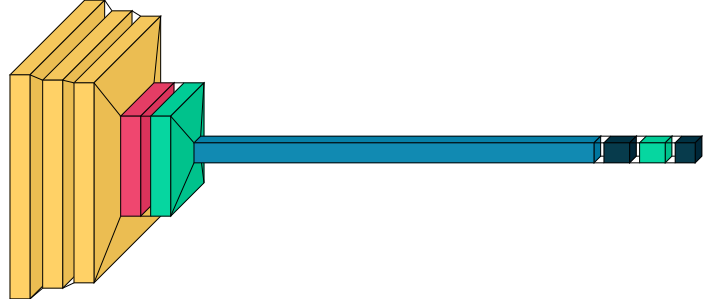

In [15]:
#change the model number to the the best performing one
visualkeras.layered_view(model_1)

In [16]:
history_1 = model_fitting(model_1, X_train, y_train, X_val, y_val)

Epoch 1/15
981/981 [==============================] - 248s 253ms/step - loss: 1.0775 - accuracy: 0.6944 - val_loss: 0.1287 - val_accuracy: 0.9652
Epoch 2/15
981/981 [==============================] - 235s 240ms/step - loss: 0.2317 - accuracy: 0.9328 - val_loss: 0.0871 - val_accuracy: 0.9788
Epoch 3/15
981/981 [==============================] - 236s 240ms/step - loss: 0.1436 - accuracy: 0.9565 - val_loss: 0.0766 - val_accuracy: 0.9818
Epoch 4/15
981/981 [==============================] - 246s 251ms/step - loss: 0.1120 - accuracy: 0.9653 - val_loss: 0.0532 - val_accuracy: 0.9869
Epoch 5/15
981/981 [==============================] - 244s 249ms/step - loss: 0.0915 - accuracy: 0.9727 - val_loss: 0.0728 - val_accuracy: 0.9838
Epoch 6/15
981/981 [==============================] - 254s 258ms/step - loss: 0.0840 - accuracy: 0.9748 - val_loss: 0.0546 - val_accuracy: 0.9847
Epoch 7/15
981/981 [==============================] - 271s 276ms/step - loss: 0.0628 - accuracy: 0.9807 - val_loss: 0.0510 -

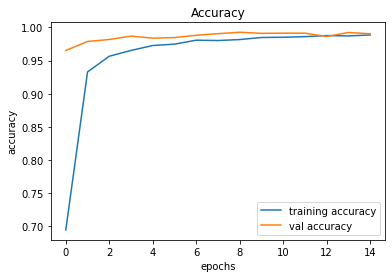

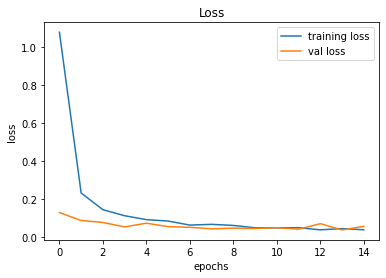

In [17]:
plot_accuracy(history_1)
plot_validation(history_1)

In [18]:
classes_x = predict_class(model_1, X_test)
model_1_accuracy = accuracy(y_test, classes_x)
print(model_1_accuracy)

0.965083135391924


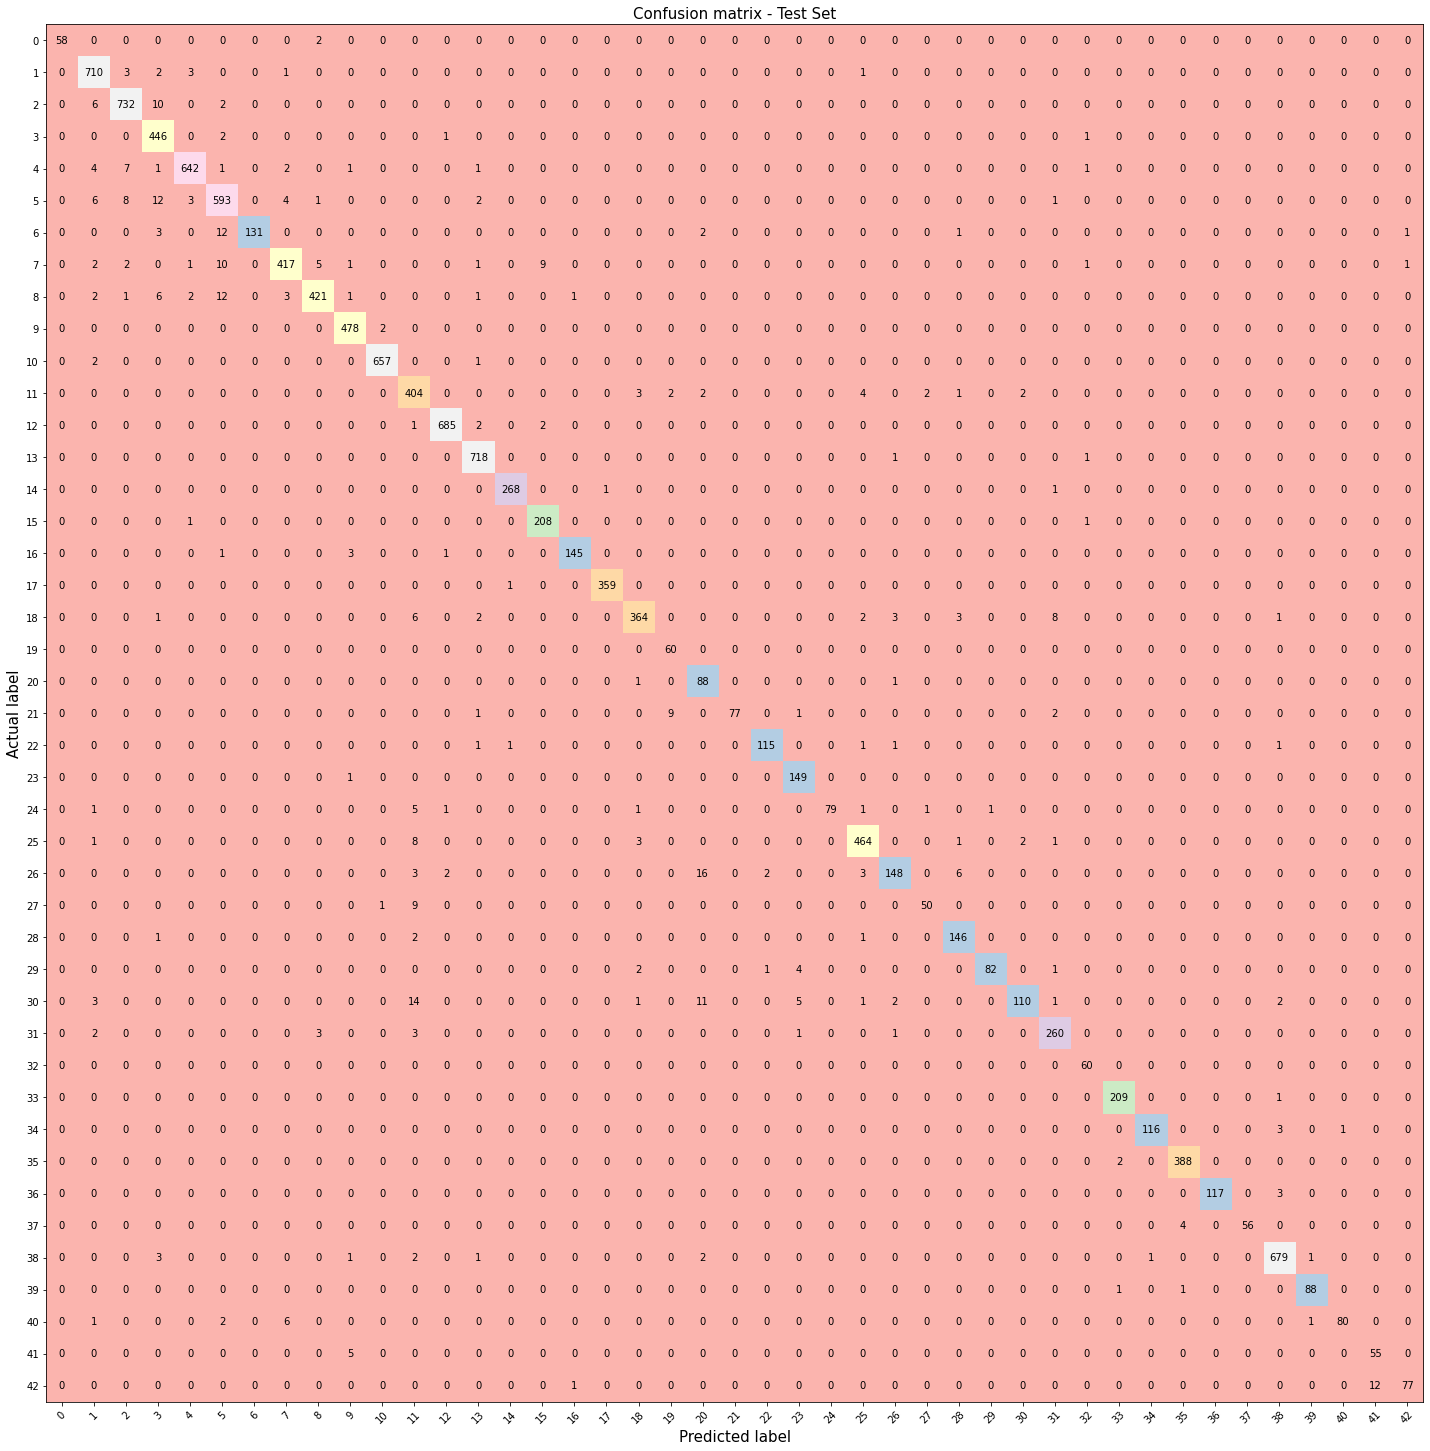

In [19]:
cnf_matrix_test = confusion_matrix_plot(y_test, classes_x)

In [20]:
index,cols = misclassified_img(cnf_matrix_test, X_test, y_test)
print(index,cols,len(index))

[5, 6, 8, 30, 26, 30, 42] [3, 5, 5, 11, 20, 20, 41] 7


IndexError: list index out of range

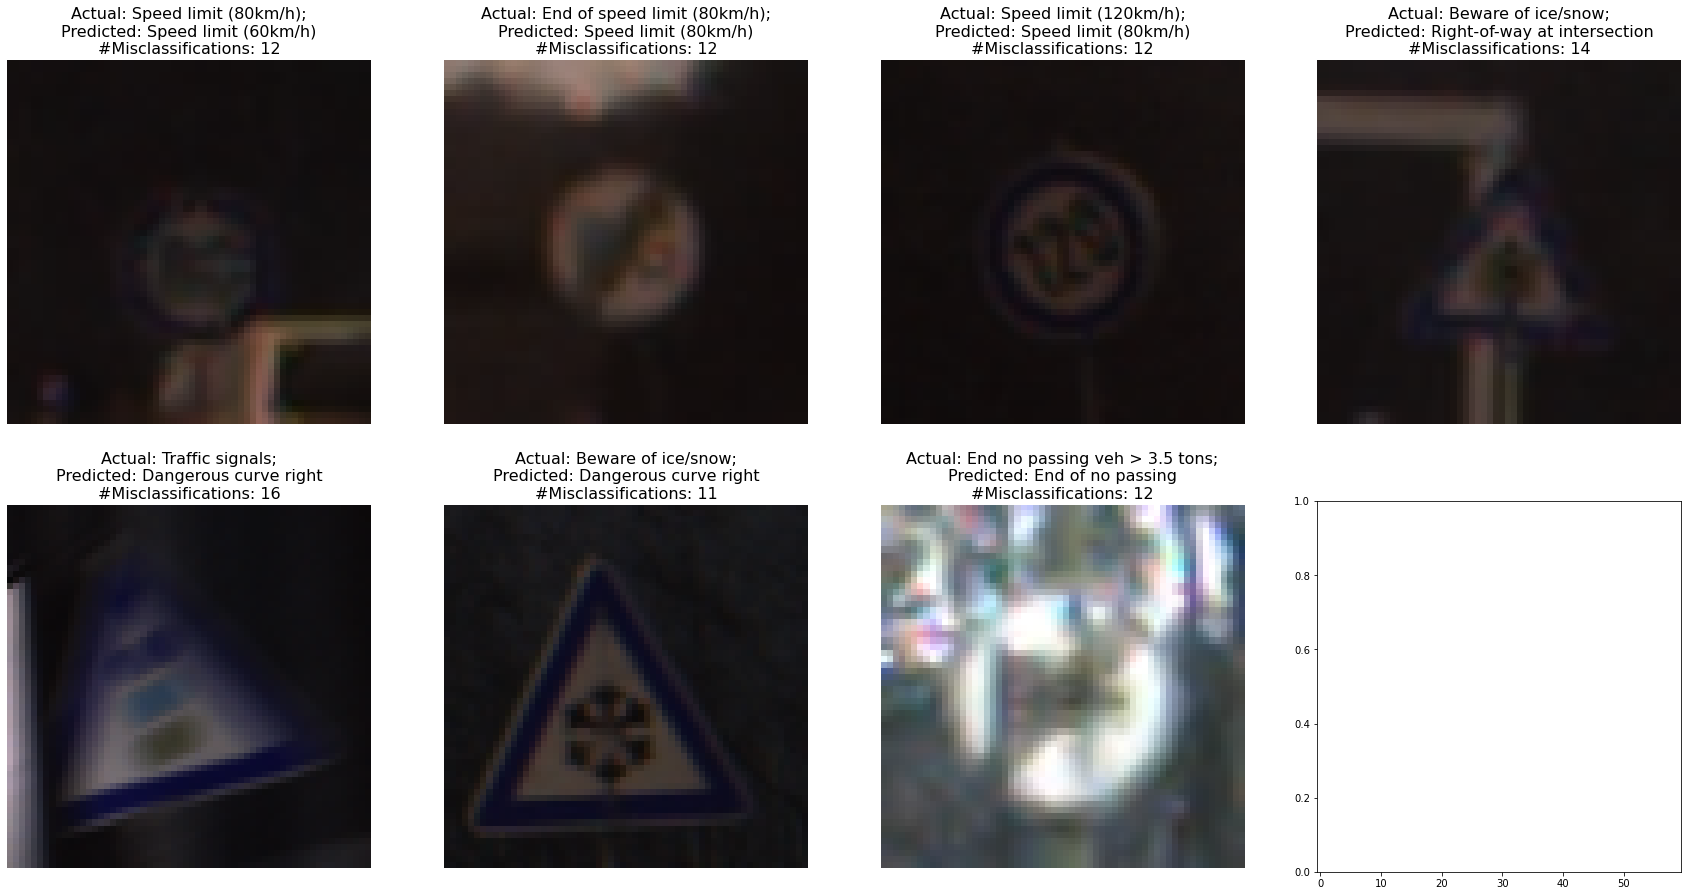

In [22]:
plot_misclassified_img(index, cols, X_test, y_test, 2, 4)

## Model 3 - CNN 2 layers

In [23]:
model_3 = Sequential()
model_3.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model_3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(rate=0.25))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(rate=0.5))
model_3.add(Dense(43, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

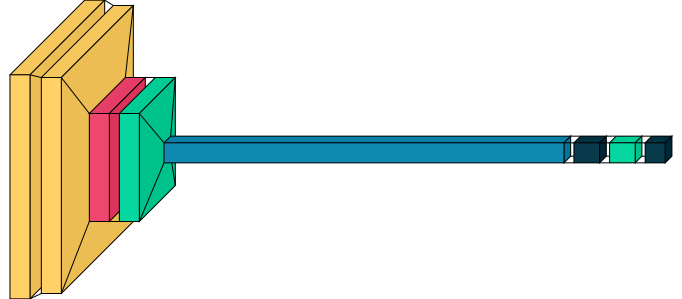

In [24]:
#change the model number to the the best performing one
visualkeras.layered_view(model_3)

In [25]:
history_3 = model_fitting(model_3, X_train, y_train, X_val, y_val)

Epoch 1/15
981/981 [==============================] - 260s 265ms/step - loss: 0.9068 - accuracy: 0.7483 - val_loss: 0.1408 - val_accuracy: 0.9679
Epoch 2/15
981/981 [==============================] - 264s 269ms/step - loss: 0.2127 - accuracy: 0.9370 - val_loss: 0.0852 - val_accuracy: 0.9781
Epoch 3/15
981/981 [==============================] - 256s 261ms/step - loss: 0.1286 - accuracy: 0.9621 - val_loss: 0.0605 - val_accuracy: 0.9856
Epoch 4/15
981/981 [==============================] - 269s 275ms/step - loss: 0.1005 - accuracy: 0.9689 - val_loss: 0.0504 - val_accuracy: 0.9883
Epoch 5/15
981/981 [==============================] - 264s 269ms/step - loss: 0.0810 - accuracy: 0.9744 - val_loss: 0.0494 - val_accuracy: 0.9884
Epoch 6/15
981/981 [==============================] - 261s 266ms/step - loss: 0.0702 - accuracy: 0.9779 - val_loss: 0.0493 - val_accuracy: 0.9901
Epoch 7/15
981/981 [==============================] - 271s 277ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0710 -

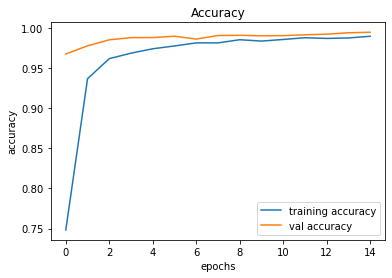

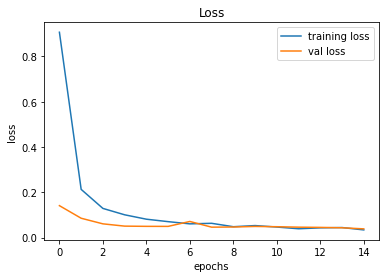

In [26]:
plot_accuracy(history_3)
plot_validation(history_3)

In [27]:
classes_x = predict_class(model_3, X_test)
model_3_accuracy = accuracy(y_test, classes_x)
print(model_3_accuracy)

0.9693586698337292


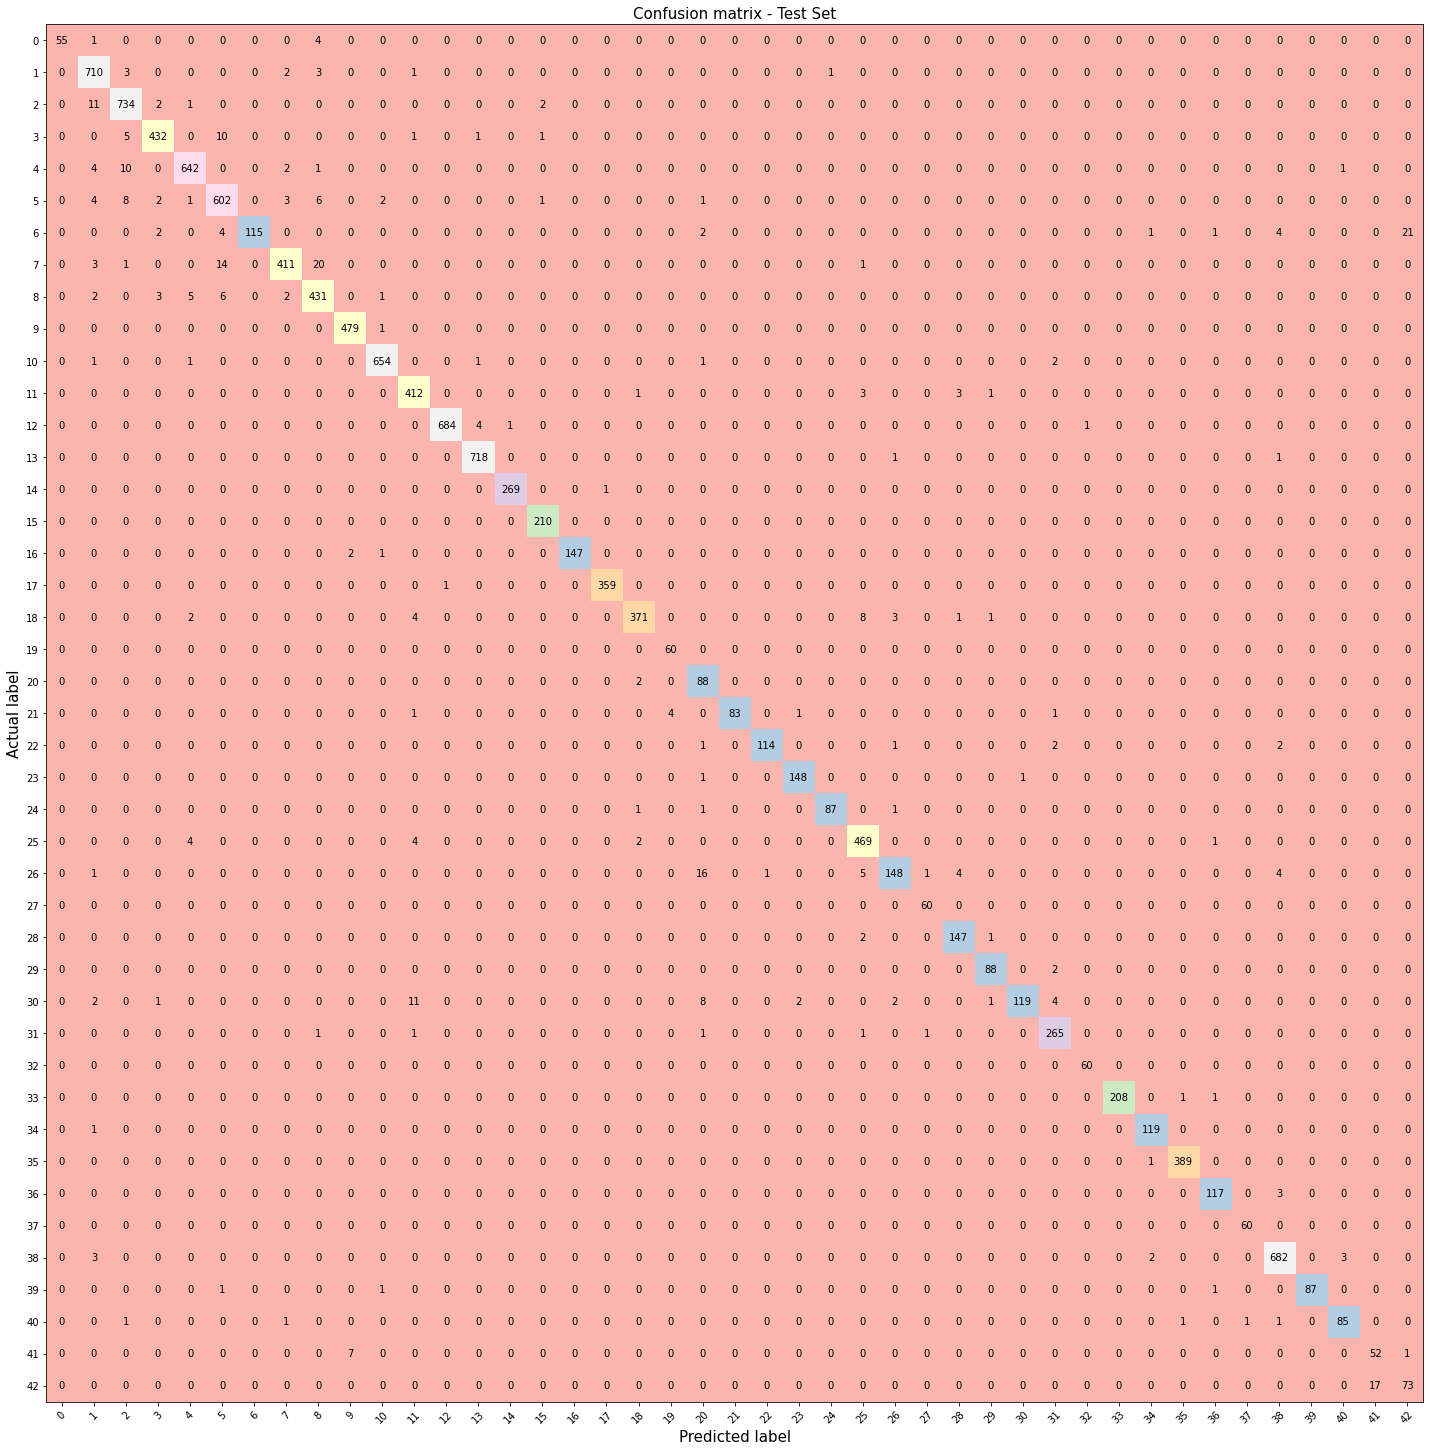

In [29]:
cnf_matrix_test = confusion_matrix_plot(y_test, classes_x)

In [30]:
index, cols = misclassified_img(cnf_matrix_test, X_test, y_test)
print(index, cols, len(index))

[2, 7, 7, 30, 26, 42, 6] [1, 5, 8, 11, 20, 41, 42] 7


IndexError: list index out of range

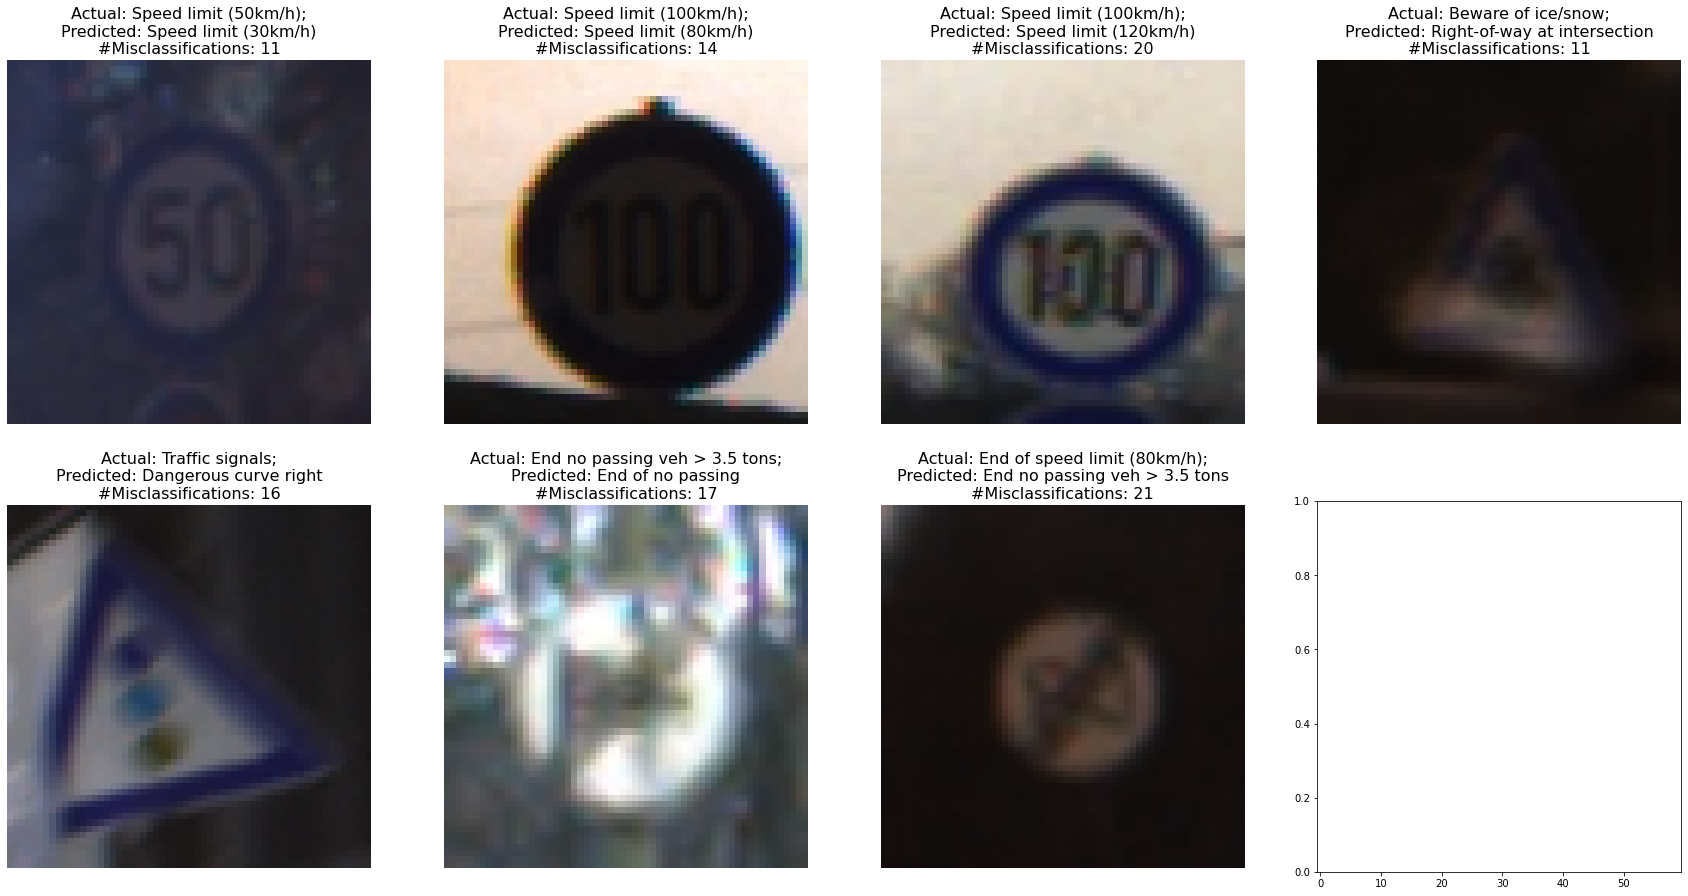

In [31]:
plot_misclassified_img(index, cols, X_test, y_test, 2, 4)

## Convert images to grayscale and run the CNN with 2 layers

In [34]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def pre_process(img):
    img = np.array(img)
    return grayscale(img).reshape([60,60,1])


def equalize(img):
    return cv2.equalizeHist(img.astype(np.uint8))

def exp_equalize(img):
    return exposure.equalize_hist(img.astype(np.uint8))


def plot_hist(img):
    plt.hist(img.flatten()*255, bins = 256)
    plt.show()
    return

In [35]:
data_preprocessed = np.array(list(map(pre_process, Cells)))
print(data_preprocessed.shape)

X_test_preprocessed = np.array(list(map(pre_process, X_test)))
print(X_test_preprocessed.shape)

(39209, 60, 60, 1)
(12630, 60, 60, 1)


In [36]:
#Splitting the images into train and validation sets
(X_train,X_val)=data_preprocessed[(int)(0.2*len(data_preprocessed)):],data_preprocessed[:(int)(0.2*len(data_preprocessed))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
# (y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

# #Using one hote encoding for the train and validation labels
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, 43)
# y_val = to_categorical(y_val, 43)

In [37]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape, X_test.shape,y_test.shape

((31368, 60, 60, 1),
 (31368, 43),
 (7841, 60, 60, 1),
 (7841, 43),
 (12630, 60, 60, 3),
 (12630,))

In [38]:
model_3_1 = Sequential()
model_3_1.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model_3_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_3_1.add(MaxPool2D(pool_size=(2, 2)))
model_3_1.add(Dropout(rate=0.25))
model_3_1.add(Flatten())
model_3_1.add(Dense(256, activation='relu'))
model_3_1.add(Dropout(rate=0.5))
model_3_1.add(Dense(43, activation='softmax'))

model_3_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

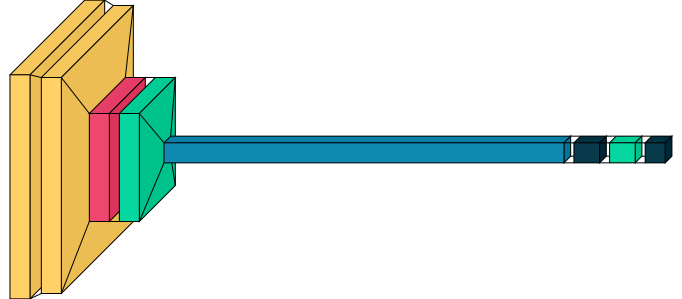

In [39]:
#change the model number to the the best performing one
visualkeras.layered_view(model_3_1)

In [40]:
history_3_1 = model_fitting(model_3_1, X_train, y_train, X_val, y_val)

Epoch 1/15
981/981 [==============================] - 257s 261ms/step - loss: 1.0807 - accuracy: 0.7033 - val_loss: 0.1794 - val_accuracy: 0.9605
Epoch 2/15
981/981 [==============================] - 254s 259ms/step - loss: 0.3033 - accuracy: 0.9099 - val_loss: 0.0994 - val_accuracy: 0.9756
Epoch 3/15
981/981 [==============================] - 259s 264ms/step - loss: 0.1943 - accuracy: 0.9408 - val_loss: 0.0902 - val_accuracy: 0.9765
Epoch 4/15
981/981 [==============================] - 263s 268ms/step - loss: 0.1524 - accuracy: 0.9527 - val_loss: 0.0811 - val_accuracy: 0.9759
Epoch 5/15
981/981 [==============================] - 269s 275ms/step - loss: 0.1294 - accuracy: 0.9592 - val_loss: 0.0677 - val_accuracy: 0.9839
Epoch 6/15
981/981 [==============================] - 258s 263ms/step - loss: 0.1043 - accuracy: 0.9662 - val_loss: 0.0719 - val_accuracy: 0.9839
Epoch 7/15
981/981 [==============================] - 252s 257ms/step - loss: 0.0917 - accuracy: 0.9703 - val_loss: 0.0639 -

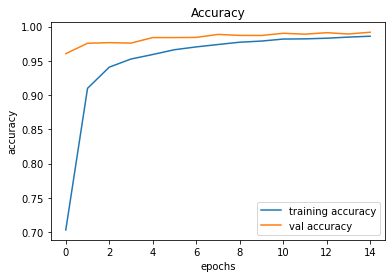

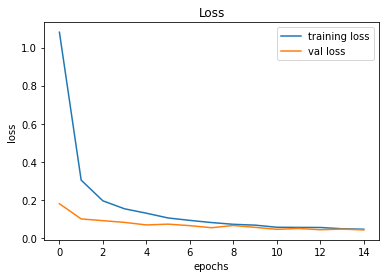

In [41]:
plot_accuracy(history_3_1)
plot_validation(history_3_1)

In [42]:
classes_x = predict_class(model_3_1, X_test_preprocessed)
model_3_1_accuracy = accuracy(y_test, classes_x)
print(model_3_1_accuracy)

0.957957244655582


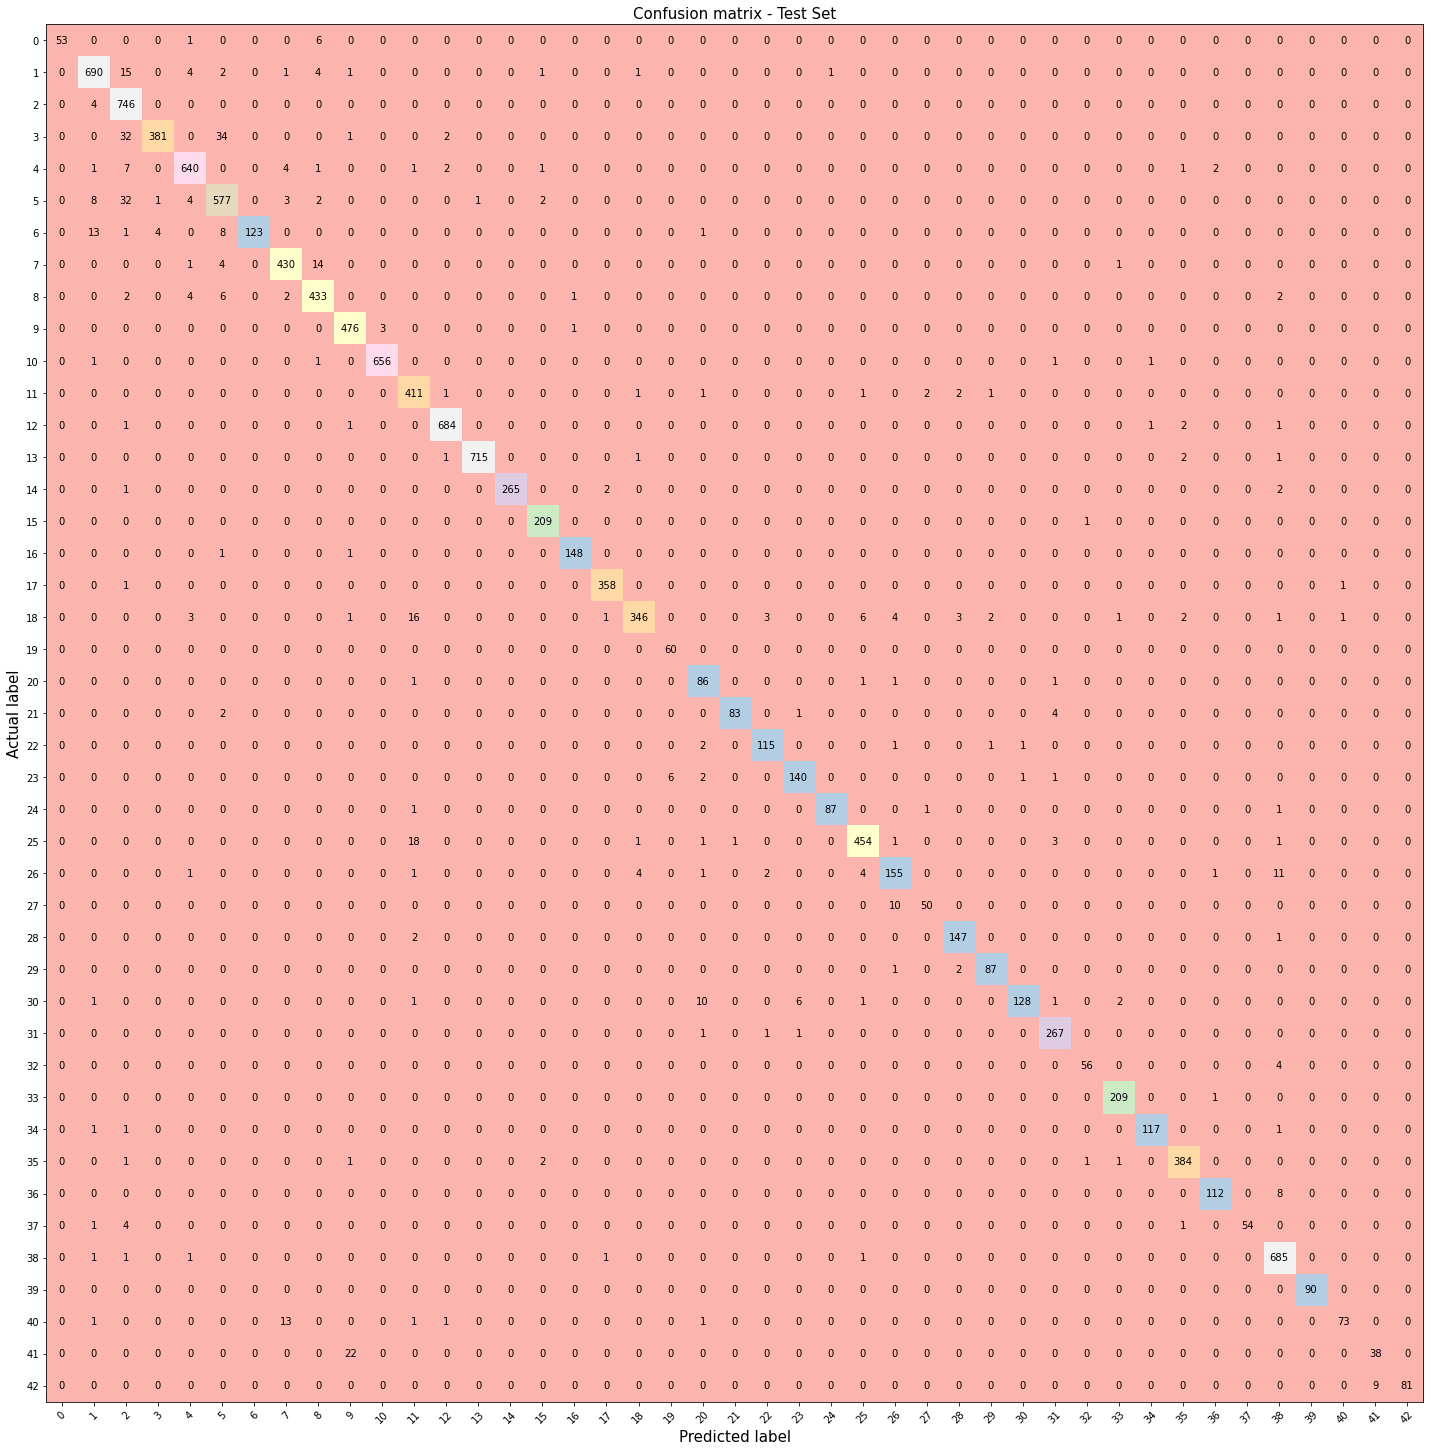

In [43]:
cnf_matrix_test = confusion_matrix_plot(y_test, classes_x)

In [44]:
index, cols = misclassified_img(cnf_matrix_test, X_test_preprocessed, y_test)
print(index, cols, len(index))

[6, 1, 3, 5, 3, 40, 7, 41, 18, 25, 26] [1, 2, 2, 2, 5, 7, 8, 9, 11, 11, 38] 11


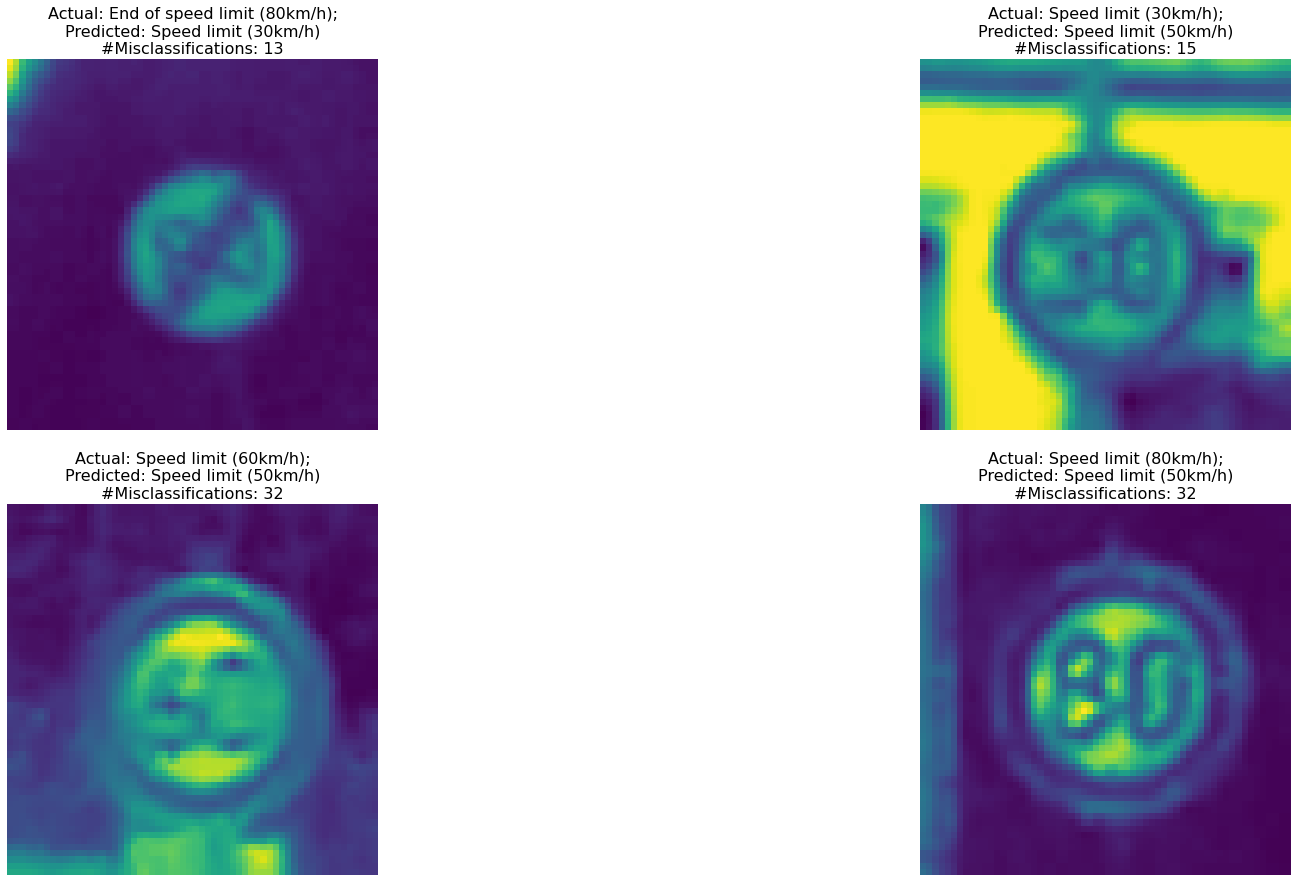

In [45]:
plot_misclassified_img(index, cols, X_test_preprocessed, y_test, 2, 2)

<AxesSubplot:title={'center':'Error by Class on Test Set'}>

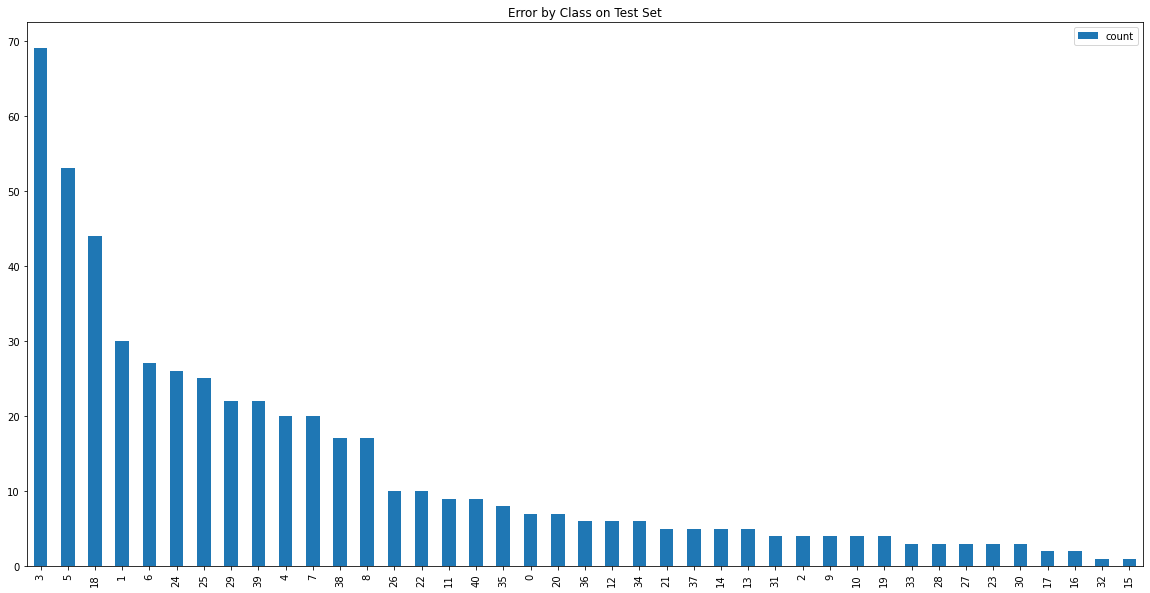

In [46]:
y_test[y_test!=classes_x]
unique_elements, counts_elements = np.unique(y_test[y_test!=classes_x], return_counts=True)
df_sorted = pd.DataFrame(counts_elements, index=[unique_elements],columns=['count']).reset_index(drop=True).sort_values(by=['count'],ascending=False)
df_sorted.plot(kind='bar',figsize=(20,10),title='Error by Class on Test Set')

## Compare accuracy of all models

In [47]:
accuracy_df = pd.DataFrame([model_1_accuracy, model_3_accuracy, model_3_1_accuracy], index=['3_layers','2_layers','2_layers_grayscale_data'], columns=['Accuracy'])
accuracy_df

,Accuracy
3_layers,0.965083
2_layers,0.969359
2_layers_grayscale_data,0.957957


## Comparing learning parameters for model with colored images and grayscaled images

### Colored images - Total 11,997,035 parameters learned

In [50]:
model_3.summary()## Comparing learning parameters for model with colored images and grayscaled images

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        4864      
                                                                 
 conv2d_4 (Conv2D)           (None, 54, 54, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 27, 27, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               11944192  
                                                      

### Grayscaled images - Total 11,993,835 parameters learned

In [49]:
model_3_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        1664      
                                                                 
 conv2d_6 (Conv2D)           (None, 54, 54, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 27, 27, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               11944192  
                                                      

# END-OF-CODE